<a href="https://colab.research.google.com/github/aayushbokde/DL_study/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
print(df.shape)

(10000, 14)


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)

In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [ ]:
X_train_scale

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(3, activation='sigmoid',input_dim=11))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132 (532.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)

In [ ]:
# total 11 inputs, 3 nodes in hidden layer and a single output

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam')


In [ ]:
model.fit(X_train_scale, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5707
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5219
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5119
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4986
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4978
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5120
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5025
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4934
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5070
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4889


In [ ]:
model.layers[0].get_weights()

[array([[ 2.4459954e-01,  7.2635613e-02,  7.8150909e-04],
        [-7.7140802e-01, -3.1199236e+00, -1.0331932e+00],
        [ 2.2807576e-01, -5.8928276e-03, -5.4750431e-02],
        [-5.1907659e-01, -3.0088982e-01, -4.2693108e-01],
        [ 2.5463662e-01, -7.6850457e-03,  3.1708587e-02],
        [ 1.7647460e-02,  4.3240853e-04,  8.4350646e-02],
        [ 1.3672632e+00,  1.6282611e-01,  1.3128142e+00],
        [ 4.4568479e-02,  1.1115971e-01, -3.1628144e-01],
        [-8.0941457e-01, -2.9483867e-01, -1.0933006e+00],
        [-7.5322174e-02,  1.4361376e-01, -9.5836967e-02],
        [ 8.5422963e-01,  2.2395767e-01,  7.5862831e-01]], dtype=float32),
 array([-0.07903569, -0.02718595, -0.07233109], dtype=float32)]

the above are 33 weights and 3 biases of 1st layer

In [ ]:
y_log = model.predict(X_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7925

trying to improve the output or prediction

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(11, activation='relu',input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scale, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6599 - loss: 0.6182 - val_accuracy: 0.7975 - val_loss: 0.4753
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4642 - val_accuracy: 0.8031 - val_loss: 0.4421
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4439 - val_accuracy: 0.8144 - val_loss: 0.4294
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8158 - loss: 0.4132 - val_accuracy: 0.8131 - val_loss: 0.4235
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8001 - loss: 0.4250 - val_accuracy: 0.8138 - val_loss: 0.4190
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8143 - loss: 0.4109 - val_accuracy: 0.8150 - val_loss: 0.4132
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8166 - loss: 0.4010 - val_accuracy: 0.8200 - val_loss: 0.4056
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8269 - loss: 0.3963 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[-9.10604149e-02, -1.50635123e-01, -2.53857315e-01,
         -8.81690159e-02,  2.88410962e-01,  2.67501861e-01,
         -4.74209756e-01, -3.92971560e-02, -1.51150450e-01,
         -2.70659402e-02,  8.23589638e-02],
        [-7.48161137e-01, -1.21019268e+00,  1.02722220e-01,
         -3.52386922e-01, -7.72375584e-01,  5.97825423e-02,
         -4.23039526e-01,  6.59734130e-01,  6.95268735e-02,
          8.34483027e-01, -6.65382683e-01],
        [ 7.34877735e-02, -1.92521110e-01,  2.95879930e-01,
          3.30552697e-01, -2.42622450e-01, -1.34672552e-01,
         -1.41878188e-01,  9.35395360e-02,  1.13251232e-01,
          6.61096722e-02, -4.36858609e-02],
        [-6.49076998e-01, -1.95398573e-02, -9.43132909e-05,
         -1.14292890e-01, -6.17619753e-01,  3.42631459e-01,
         -4.22830284e-01, -1.18589115e+00, -4.85065252e-01,
         -6.11410029e-02,  1.32136550e-02],
        [ 3.25809747e-01, -3.35521281e-01, -1.77283153e-01,
          2.81585511e-02, -1.53969064e-01,  

In [ ]:
y_log = model.predict(X_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.864

In [ ]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.7518749833106995,
  0.7987499833106995,
  0.8021875023841858,
  0.8067187666893005,
  0.8100000023841858,
  0.8134375214576721,
  0.8193749785423279,
  0.8271874785423279,
  0.8324999809265137,
  0.8404687643051147,
  0.8459374904632568,
  0.8521875143051147,
  0.8559374809265137,
  0.8587499856948853,
  0.8598437309265137,
  0.8604687452316284,
  0.8618749976158142,
  0.8614062666893005,
  0.8623437285423279,
  0.8639062643051147,
  0.8621875047683716,
  0.8650000095367432,
  0.8662499785423279,
  0.8650000095367432,
  0.8650000095367432,
  0.8662499785423279,
  0.8662499785423279,
  0.8648437261581421,
  0.8653125166893005,
  0.866406261920929,
  0.8650000095367432,
  0.8665624856948853,
  0.866406261920929,
  0.8662499785423279,
  0.8670312762260437,
  0.8660937547683716,
  0.8681250214576721,
  0.8660937547683716,
  0.8670312762260437,
  0.8662499785423279,
  0.8657812476158142,
  0.8673437237739563,
  0.8668749928474426,
  0.8659374713897705,
  0.8665624856948853,


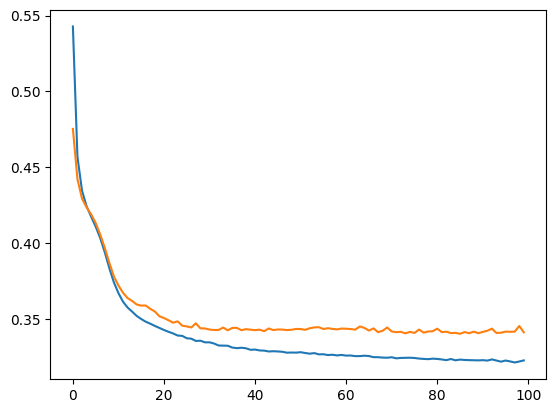

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


this graph can show the overfitting int the model